In [1]:
import cv2 
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic=mp.solutions.holistic
mp_drawing=mp.solutions.drawing_utils

def mediapipe_detection(image, model):
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable=False 
    results=model.process(image)
    image.flags.writeable=True
    image=cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results
    
def draw_landmarks(image, results):
  # Check for available landmarks
  if results.pose_landmarks:
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
  if results.face_landmarks:
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
  if results.left_hand_landmarks:
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
  if results.right_hand_landmarks:
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)


mp_holistic.POSE_CONNECTIONS
mp_drawing.draw_landmarks    

def draw_styled_landmarks(image,results):
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,20,10),thickness=2,circle_radius=4),
            mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2))
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
            mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),
            mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1))
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121,22,76),thickness=2,circle_radius=4),
            mp_drawing.DrawingSpec(color=(121,44,250),thickness=2,circle_radius=2))
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66),thickness=2,circle_radius=4),
            mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2))

    

In [31]:
cap=cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        ret,frame=cap.read()
        
        image,results=mediapipe_detection(frame,holistic)
        print(results) 
        
        draw_styled_landmarks(image,results)
        
        cv2.imshow('OpenCV Feed',image)
        
        if cv2.waitKey(10) & 0xFF==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [4]:
len(results.left_hand_landmarks.landmark)
#len(results.face_landmarks.landmark)

# if results.right_hand_landmarks:
#     num_right_hand_landmarks = len(results.right_hand_landmarks.landmark)
#     print("Number of left hand landmarks detected:", num_right_hand_landmarks)
# else:
#     print("No left hand landmarks detected in this frame")


21

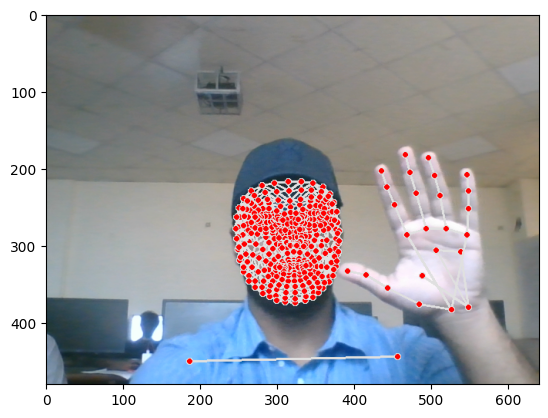

In [5]:
draw_landmarks(frame,results)
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [6]:
pose=[]
for res in results.pose_landmarks.landmark:
    test=np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)
    
pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [7]:
def extract_keypoints(results):
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    return np.concatenate([pose,face,lh,rh])

extract_keypoints(results).shape

(1662,)

In [8]:
#Folder

DATA_PATH=os.path.join('MP_Data')
actions=np.array(['hello','thanks','iloveyou'])
no_sequences=30
sequence_length=30

# hello
## 0 
## 1
## 2 
## 29
# thanks

# I love you

for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

In [9]:
result_test=extract_keypoints(results)
np.save('0',result_test)
np.load('0.npy')

array([ 0.48061281,  0.63609046, -0.75950927, ...,  0.        ,
        0.        ,  0.        ])

In [ ]:
#Run to collect data
cap=cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length): 
                        
                ret,frame=cap.read()
                image,results=mediapipe_detection(frame,holistic)
                print(results) 
                
                draw_styled_landmarks(image,results)
                
                if frame_num==0:
                    cv2.putText(image,'STARTING COLLECTION',(120,200),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA)
                    cv2.putText(image,'Collecting frames for {} video number {}'.format(action,sequence),(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                    cv2.waitKey(1000)
                else:
                    cv2.putText(image,'Collecting frames for {} video number {}'.format(action,sequence),(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                
                keypoints=extract_keypoints(results)
                npy_path=os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(npy_path,keypoints)
                
                cv2.imshow('OpenCV Feed',image)
        
                if cv2.waitKey(10) & 0xFF==ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()
    

In [ ]:

cap.release()
cv2.destroyAllWindows()

In [10]:
#process data

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

label_map={label:num for num,label in enumerate(actions)}

label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [11]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])
        
np.array(sequences).shape
np.array(labels).shape
x=np.array(sequences)
x.shape
y=to_categorical(labels).astype(int)
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05)
x_train.shape

(85, 30, 1662)

In [13]:
#Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard


log_dir=os.path.join('Logs')
tb_callback=TensorBoard(log_dir=log_dir)

model=Sequential()
model.add(LSTM(64,return_sequences=True,activation='relu',input_shape=(30,1662)))
model.add(LSTM(128,return_sequences=True,activation='relu'))
model.add(LSTM(64,return_sequences=False,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0],activation='softmax'))



In [14]:
res=[0.7,0.2,0.1]
actions[np.argmax(res)]
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])


In [ ]:
# Run Only when new data 
model.fit(x_train,y_train,epochs=1000,callbacks=[tb_callback])

In [15]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

In [16]:
res=model.predict(x_test)
actions[np.argmax(res[0])]

'hello'

In [17]:
actions[np.argmax(y_test[0])]

'hello'

In [32]:
model.save('action.h5')

In [18]:
model.load_weights('action.h5')

In [19]:
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score
yhat=model.predict(x_test)
ytrue=np.argmax(y_test,axis=1).tolist()
yhat=np.argmax(yhat,axis=1).tolist()
multilabel_confusion_matrix(ytrue,yhat)

array([[[3, 0],
        [0, 2]],

       [[4, 0],
        [0, 1]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [20]:
accuracy_score(ytrue,yhat)

1.0

In [22]:
colors=[(245,117,16),(117,245,16),(16,117,245)]
def prob_display(res,actions,input_frame,colors):  
    output_frame=input_frame.copy()
    for num,prob in enumerate(res):
        cv2.rectangle(output_frame,(0,60+num*40),(int(prob*100),90+num*40),colors[num],-1)
        cv2.putText(output_frame,actions[num],(0,85+num*40),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        
    return output_frame

#plt.imshow(prob_display(res,actions,image,colors)) 

In [29]:
# #Real Time Detection
sequence=[]
sentence=[]
threshold=0.7


cap=cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        ret,frame=cap.read()
        
        image,results=mediapipe_detection(frame,holistic)
        
        draw_styled_landmarks(image,results)
        
        keypoints=extract_keypoints(results)
        sequence.append(keypoints)
        sequence=sequence[-30:]
        
        if len(sequence) == 30:
            res=model.predict(np.expand_dims(sequence,axis=0))[0]
            print(actions[np.argmax(res)])
            if res[np.argmax(res)]>threshold:
                if len(sentence)>0:
                    if actions[np.argmax(res)]!=sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])
        
                if len(sentence)>5:
                    sentence=sentence[-5:]
            
            image=prob_display(res,actions,image,colors)
            
        cv2.rectangle(image,(0,0),(640,40),(245,117,16),-1)
        cv2.putText(image,' '.join(sentence),(3,30),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        
        
        cv2.imshow('OpenCV Feed',image)
        
        if cv2.waitKey(10) & 0xFF==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    

iloveyou


NameError: name 'prob_display' is not defined

In [24]:
model.predict(np.expand_dims(x_test[0],axis=0))

array([[0.08842017, 0.8340761 , 0.07750366]], dtype=float32)

In [30]:
cap.release()
cv2.destroyAllWindows()